<a href="https://colab.research.google.com/github/Amit-Baviskar/CodSoft-Internship-Program/blob/main/Sales_Predication_AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Sales Prediction Model Using Python*

## *Problem Statement:*


Develop a predictive model to estimate sales based on marketing expenditures across various platforms.

## *Introduction:*

Sales prediction is a cornerstone of effective business planning, enabling companies to forecast future performance and make strategic decisions. By understanding how factors like advertising spend, customer preferences, seasonal variations, and platform selection influence sales, businesses can optimize operations and boost profitability.

In today's data-driven world, leveraging predictive analytics has become essential. Businesses rely on machine learning techniques to analyze historical data, uncover key patterns, and forecast demand with accuracy. This enables smarter decisions in areas like inventory management, marketing budget allocation, and customer targeting.

Python serves as a powerful tool in this domain, offering robust libraries for data preprocessing, pattern recognition, and model building. With the right approach, organizations can transform raw data into actionable insights, refine their marketing strategies, and maximize their return on investment.

This guide provides a comprehensive walkthrough of creating a sales prediction model using Python. From preparing and analyzing the data to building and evaluating a machine learning model, it will equip you with the skills needed to tackle real-world business challenges. Whether you're a beginner exploring data analytics or a professional sharpening your expertise, this journey into sales forecasting will empower you to derive meaningful insights and drive impactful decisions.








In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Importing data
df=pd.read_csv('/content/advertising.csv')

## *Exploring The Data*

In [ ]:
# Cheacking data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Informative Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Descriptive Summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## **Insights:**

**Dataset Structure:**

The dataset comprises 200 rows and 4 columns: TV, Radio, Newspaper, and Sales.
There are no missing values in any of the columns.


**Statistical Summary:**

The average Sales value is around *15.13*, with a standard deviation of *5.28*, indicating moderate variability in sales data.
TV advertising shows the highest average expenditure *(~147.04)*, highlighting it as the primary medium for marketing investment.


**Variability:**

The maximum spending on Newspaper advertising (114.0) far exceeds the average value (30.55), suggesting potential outliers or instances of unusually high spending.

In [ ]:
# numbers of rows and columns
df.shape

(200, 4)

In [ ]:
# Cheacking for null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


<Axes: title={'center': 'Box Plots of TV, Radio, Newspaper, and Sales'}>

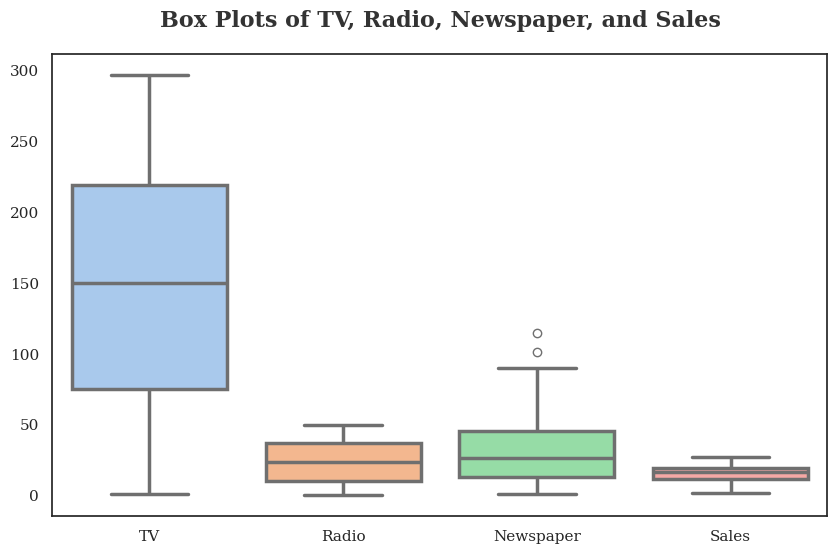

In [ ]:
# Set a light theme with a pastel color palette
sns.set_theme(style="white", palette="pastel", font="serif")

# Checking for outliers
plt.figure(figsize=(10, 6))  # Larger figure size for better visibility
boxplot = sns.boxplot(data=df[['TV', 'Radio', 'Newspaper', 'Sales']], linewidth=2.5, saturation=0.8)

# Add title and labels with subtle formatting
boxplot.set_title('Box Plots of TV, Radio, Newspaper, and Sales', fontsize=16, fontweight='bold', pad=20, color='#333333')
boxplot



## **Insights :**

There is only newspapers columns and there is no oultiers in TV, Radio and Sales.

## **Data Preparing :**

In [ ]:
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'Newspaper' column
Q1 = df['Newspaper'].quantile(0.25)  # 25th percentile
Q3 = df['Newspaper'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Compute the lower and upper boundaries for outlier detection
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

print(f"Outlier lower limit for Newspaper: {lower_boundary}")
print(f"Outlier upper limit for Newspaper: {upper_boundary}")


Outlier lower limit for Newspaper: -35.775000000000006
Outlier upper limit for Newspaper: 93.625


In [ ]:
# has Newspaper adversting cost should be alteast greater than zero . So filtering the data accordingly

lower_fence=0

df = df[(df['Newspaper'] > lower_fence) & (df['Newspaper'] <= upper_boundary )]

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(198, 4)

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


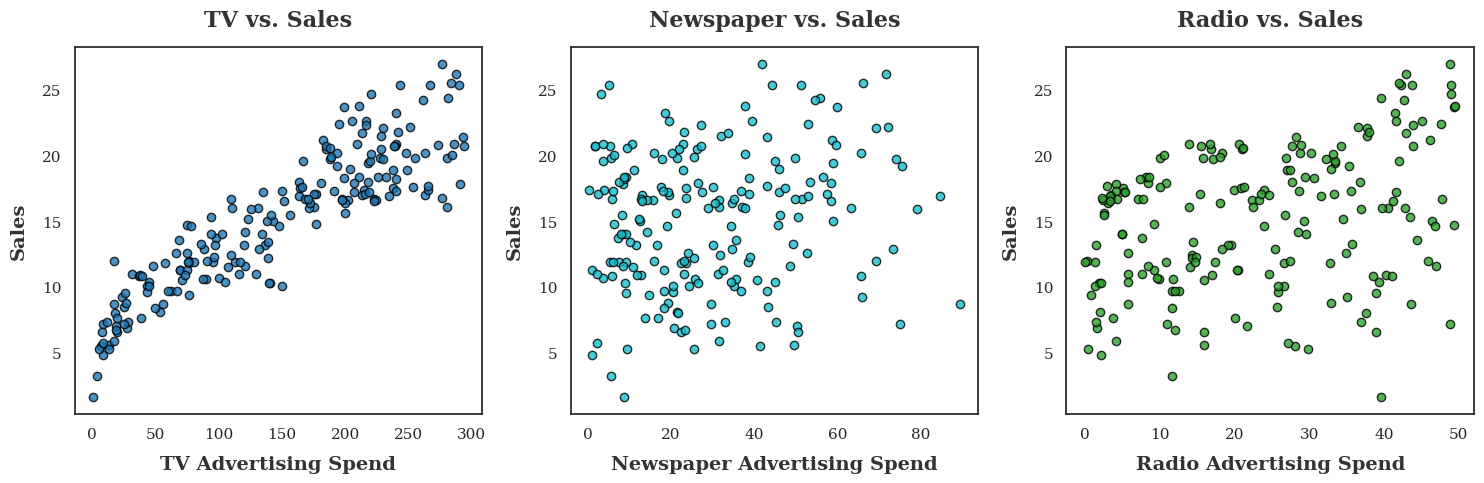

In [ ]:
# Scatterplot Between TV, Radio, and Sales
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Updated color palette: cool-toned
scatter_colors = ["#1f77b4", "#17becf", "#2ca02c"]

# Plot 'TV' vs 'Sales'
axes[0].scatter(df['TV'], df['Sales'], color=scatter_colors[0], alpha=0.8, edgecolor='black')
axes[0].set_xlabel('TV Advertising Spend', fontsize=14, fontweight='bold', labelpad=10, color="#333333")
axes[0].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10, color="#333333")
axes[0].set_title('TV vs. Sales', fontsize=16, fontweight='bold', pad=15, color="#333333")

# Plot 'Newspaper' vs 'Sales'
axes[1].scatter(df['Newspaper'], df['Sales'], color=scatter_colors[1], alpha=0.8, edgecolor='black')
axes[1].set_xlabel('Newspaper Advertising Spend', fontsize=14, fontweight='bold', labelpad=10, color="#333333")
axes[1].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10, color="#333333")
axes[1].set_title('Newspaper vs. Sales', fontsize=16, fontweight='bold', pad=15, color="#333333")

# Plot 'Radio' vs 'Sales'
axes[2].scatter(df['Radio'], df['Sales'], color=scatter_colors[2], alpha=0.8, edgecolor='black')
axes[2].set_xlabel('Radio Advertising Spend', fontsize=14, fontweight='bold', labelpad=10, color="#333333")
axes[2].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10, color="#333333")
axes[2].set_title('Radio vs. Sales', fontsize=16, fontweight='bold', pad=15, color="#333333")

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()


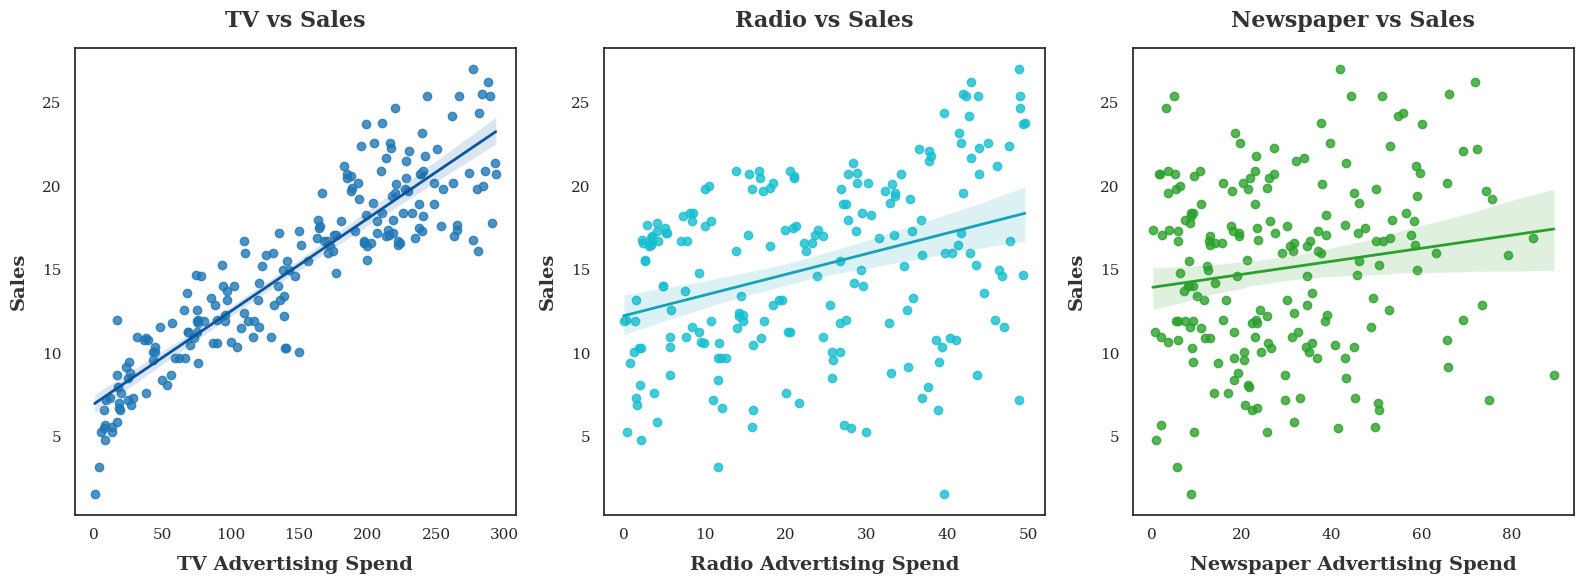

In [ ]:
# Regression plot Between TV, Radio, and Sales
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# Updated cool-toned color palette for regression lines
regression_colors = ["#1f77b4", "#17becf", "#2ca02c"]

# Regression plot 'TV' vs 'Sales'
sns.regplot(ax=axes[0], x='TV', y='Sales', data=df, color=regression_colors[0], line_kws={"color": "#0b559f", "linewidth": 2})
axes[0].set_title('TV vs Sales', fontsize=16, fontweight='bold', pad=15, color="#333333")
axes[0].set_xlabel('TV Advertising Spend', fontsize=14, fontweight='bold', labelpad=10, color="#333333")
axes[0].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10, color="#333333")

# Regression plot 'Radio' vs 'Sales'
sns.regplot(ax=axes[1], x='Radio', y='Sales', data=df, color=regression_colors[1], line_kws={"color": "#17a2b8", "linewidth": 2})
axes[1].set_title('Radio vs Sales', fontsize=16, fontweight='bold', pad=15, color="#333333")
axes[1].set_xlabel('Radio Advertising Spend', fontsize=14, fontweight='bold', labelpad=10, color="#333333")
axes[1].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10, color="#333333")

# Regression plot 'Newspaper' vs 'Sales'
sns.regplot(ax=axes[2], x='Newspaper', y='Sales', data=df, color=regression_colors[2], line_kws={"color": "#2ca02c", "linewidth": 2})
axes[2].set_title('Newspaper vs Sales', fontsize=16, fontweight='bold', pad=15, color="#333333")
axes[2].set_xlabel('Newspaper Advertising Spend', fontsize=14, fontweight='bold', labelpad=10, color="#333333")
axes[2].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10, color="#333333")

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()


**Insights:**

1. The scatterplot for **TV and Sales** shows a strong positive correlation, indicating that TV advertising spend is a good predictor of sales. A reliable predictive model can likely be built using this variable.

2. The **Radio and Sales** scatterplot reveals a moderate positive relationship, suggesting that while radio advertising impacts sales, its effect is not as strong as TV.

3. The relationship between **Newspaper and Sales** appears weak, indicating that newspaper advertising has minimal influence on sales compared to TV and Radio.

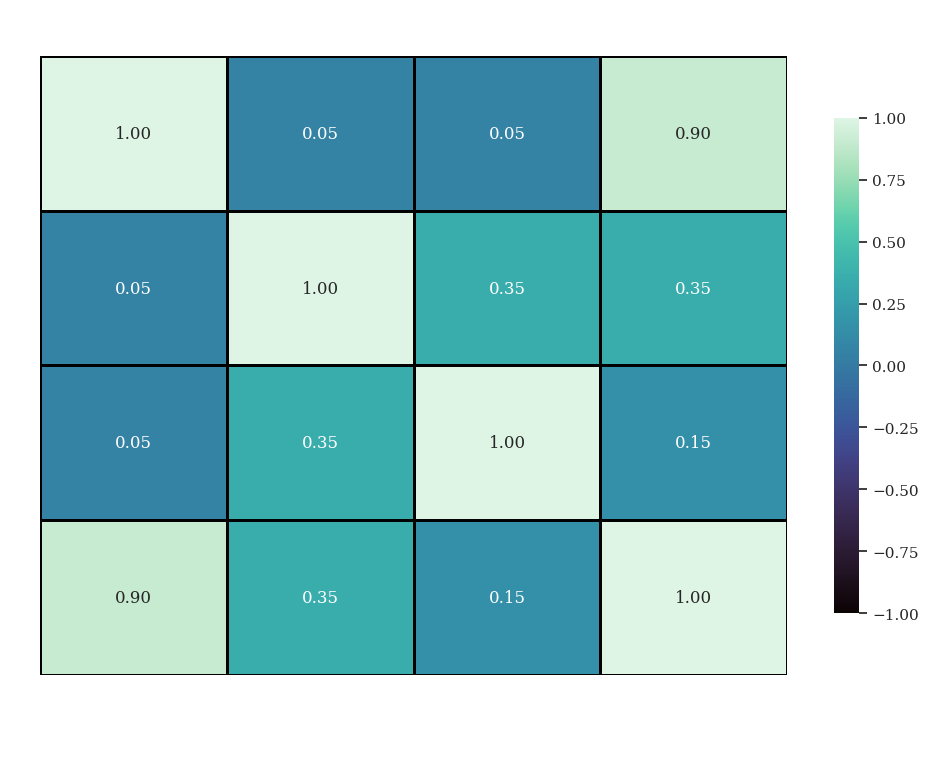

In [ ]:
# Correlation plot with updated formatting
plt.figure(figsize=(10, 8))

# Updated color palette and styling
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='mako',  # Use a visually distinct palette
    fmt='.2f',
    linewidths=1,  # Thicker lines for better separation
    linecolor='black',  # Black grid lines for contrast
    cbar=True,
    cbar_kws={'shrink': 0.8},  # Adjust color bar size
    vmin=-1, vmax=1  # Correlation value range
)

# Add title and axis labels with enhanced formatting
plt.title('Feature Correlation Matrix', fontsize=18, fontweight='bold', pad=20, color='white')
plt.xticks(fontsize=12, fontweight='bold', color='white', rotation=45)
plt.yticks(fontsize=12, fontweight='bold', color='white')
plt.gca().set_facecolor('#2a2a2a')  # Dark background for the plot area
plt.tight_layout()

# Display the plot
plt.show()


# **Insights :**


Correlation Between Advertising Channels and Sales :


TV advertising has the highest positive correlation with Sales (approximately 0.9), suggesting that TV spending significantly impacts sales.


Radio advertising also shows a moderate positive correlation with Sales (~0.35), but less than TV.



### **Low Influence of Newspaper Advertising :**

Newspaper advertising has a very weak correlation with Sales, implying it has little to no direct impact on driving sales.

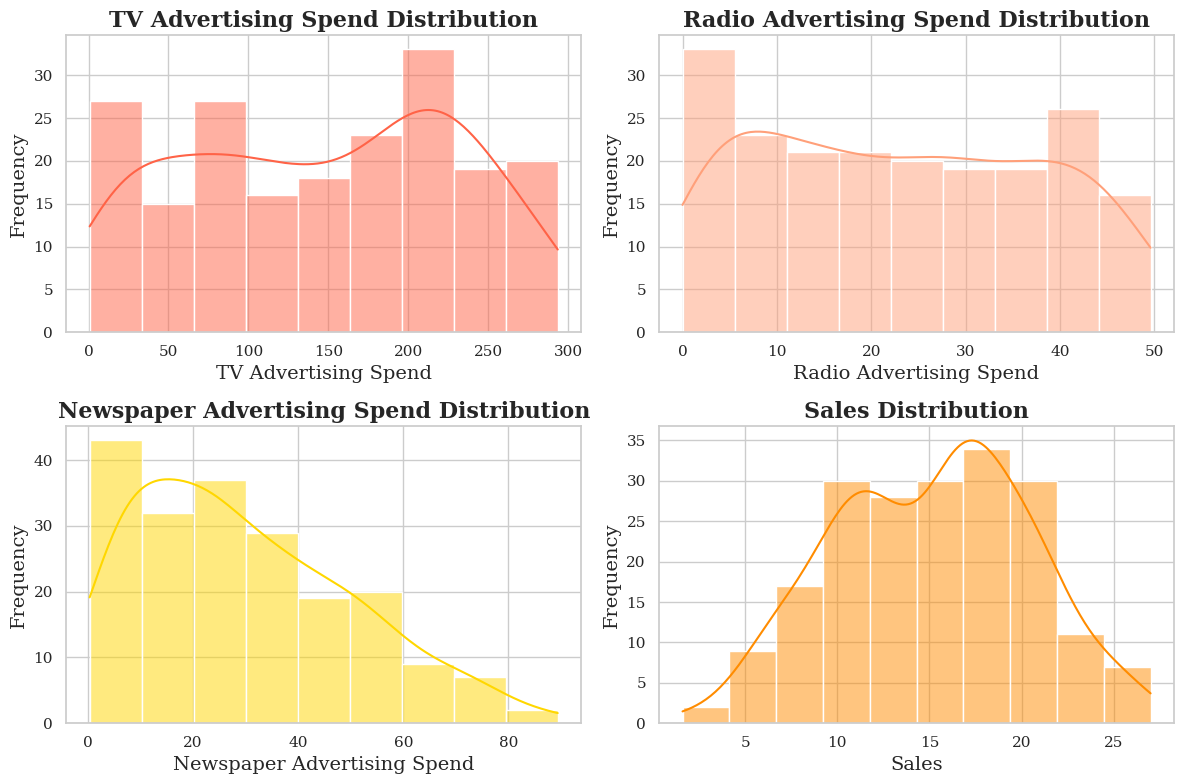

In [ ]:
# Set a refined theme
sns.set_theme(style="whitegrid", font="serif")

# Distribution plots for TV, Radio, Newspaper, and Sales
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# TV Advertising Spend Distribution
sns.histplot(df['TV'], kde=True, ax=axes[0, 0], color='#FF6347')  # Tomato Red
axes[0, 0].set_title('TV Advertising Spend Distribution', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('TV Advertising Spend', fontsize=14, fontweight='medium')
axes[0, 0].set_ylabel('Frequency', fontsize=14, fontweight='medium')

# Radio Advertising Spend Distribution
sns.histplot(df['Radio'], kde=True, ax=axes[0, 1], color='#FFA07A')  # Light Salmon
axes[0, 1].set_title('Radio Advertising Spend Distribution', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Radio Advertising Spend', fontsize=14, fontweight='medium')
axes[0, 1].set_ylabel('Frequency', fontsize=14, fontweight='medium')

# Newspaper Advertising Spend Distribution
sns.histplot(df['Newspaper'], kde=True, ax=axes[1, 0], color='#FFD700')  # Gold
axes[1, 0].set_title('Newspaper Advertising Spend Distribution', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Newspaper Advertising Spend', fontsize=14, fontweight='medium')
axes[1, 0].set_ylabel('Frequency', fontsize=14, fontweight='medium')

# Sales Distribution
sns.histplot(df['Sales'], kde=True, ax=axes[1, 1], color='#FF8C00')  # Dark Orange
axes[1, 1].set_title('Sales Distribution', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Sales', fontsize=14, fontweight='medium')
axes[1, 1].set_ylabel('Frequency', fontsize=14, fontweight='medium')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


# **Insights :**

**Distribution Insights :**


TV advertising expenditure is broadly distributed across all ranges, with a higher concentration around the mid-range (150-250).

Radio and Newspaper expenditures are more concentrated towards the lower end, suggesting limited spending in these channels.


**Sales Distribution :**


Sales distribution is relatively normal, with a peak around the mean sales value (~$15).
There are no significant outliers, indicating that the dataset is well-suited for modeling.

# **Model Building :**

- **There is a  linear relationship between the columns,we will use Linear Regression.**

In [ ]:
# Feature selection and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X[['TV', 'Radio', 'Newspaper']], df['Sales'], test_size=0.2, random_state=42)
# Changed X['TV'] to X[['TV']] to create a DataFrame with a single column

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (158, 3)
X_test shape : (40, 3)
y_train shape : (158,)
y_test shape : (40,)


In [ ]:
# Cheacking train data
X_train.head()

,TV,Radio,Newspaper
139,184.9,43.9,1.7
5,8.7,48.9,75.0
67,139.3,14.5,10.2
140,73.4,17.0,12.9
106,25.0,11.0,29.7


In [ ]:
# Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Predicitng Values

res=model.predict(X_test)
print(res.shape)

(40,)


In [ ]:
# Priting predicted Values
print(res)

[ 8.82481623 13.77055468 24.22481723 11.10056512  9.32009201 21.48456053
 20.15850056 12.76167515 15.12881886 21.08287367 15.98934888 20.38088326
  8.16535464 14.03642672  8.9375406  10.73054602  9.35201578 15.82574293
  9.79573284 11.63821168 12.60519985 17.21866213 23.44516693  7.02979947
 18.7214195  20.9597909   8.20661353 18.25399281  7.45331361 14.85839901
 18.74710884 14.11078068  9.01994517 13.07559033 19.30878714 17.89362267
 16.88640389 14.52324791 19.60537819 17.74576003]


In [ ]:
# Test Values for Predicted values
print(y_test)

66     11.0
116    12.2
17     24.4
143    10.4
158     7.3
128    24.7
142    20.1
31     11.9
19     14.6
169    20.0
160    16.4
15     22.4
56      5.5
57     13.2
117     9.4
46     10.6
126     6.6
9      15.6
149    10.1
86     12.0
115    12.6
163    18.0
61     24.2
189     6.7
74     17.0
69     22.3
121     7.0
165    16.9
119     6.6
177    16.7
70     18.3
77     14.2
127    11.9
83     13.6
25     17.0
193    19.6
97     20.5
173    16.7
20     18.0
152    16.6
Name: Sales, dtype: float64


In [ ]:
# model Coefficent
model.coef_

# Sales= 4.7141 + 0.0545⋅Feature_1 + 0.1009⋅Feature_2 + 0.0043⋅Feature_3

array([0.05395925, 0.10101512, 0.00746937])

In [ ]:
# model Intercept
model.intercept_

4.623695319484101

In [ ]:
# Checking Accuracy score for model
print(model.score(X_test,y_test)*100)

91.30003152798272


In [ ]:
y_test.head()

,Sales
66,11.0
116,12.2
17,24.4
143,10.4
158,7.3


In [ ]:
# Feature selection and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Note the change: X is passed directly to train_test_split

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (158, 3)
X_test shape : (40, 3)
y_train shape : (158,)
y_test shape : (40,)


In [ ]:
X_test.head()

,TV,Radio,Newspaper
66,31.5,24.6,2.2
116,139.2,14.3,25.6
17,281.4,39.6,55.8
143,104.6,5.7,34.4
158,11.7,36.9,45.2


In [ ]:
# Function to plot individual features against sales
def plot_feature_vs_sales(feature_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[feature_name], y_test, color='#2A9D8F', label='Actual Sales')  # Cool teal for actual sales
    plt.scatter(X_test[feature_name], y_pred, color='#E9C46A', label='Predicted Sales')  # Warm yellow for predicted sales

    # Regression line
    coef_index = X_train.columns.get_loc(feature_name)
    plt.plot(X_test[feature_name], model.intercept_ + model.coef_[coef_index] * X_test[feature_name], color='#264653', label='Regression Line')  # Dark green for regression line

    plt.xlabel(feature_name, fontsize=14, fontweight='bold')
    plt.ylabel('Sales', fontsize=14, fontweight='bold')
    plt.title(f'Sales vs {feature_name}', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.show()


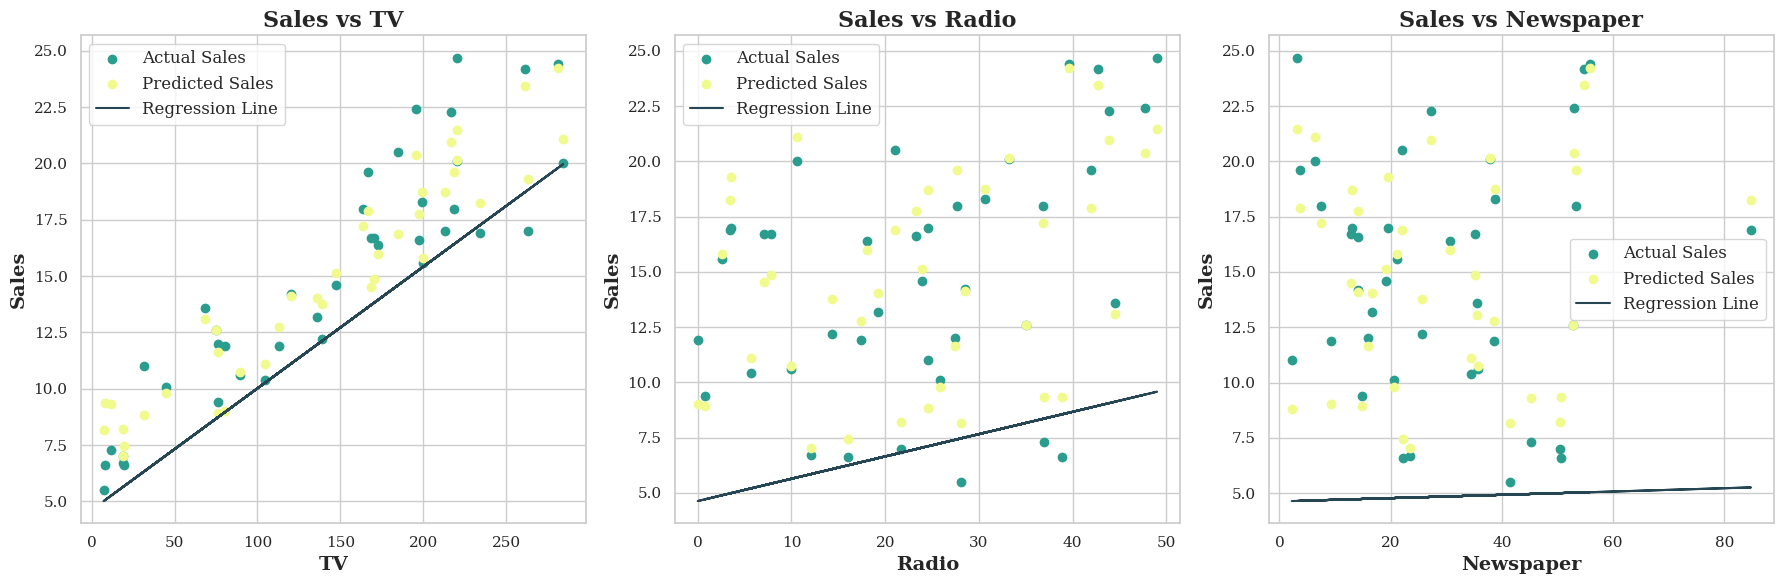

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjust figsize as needed

# Plot for each feature in a subplot
for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    axes[i].scatter(X_test[feature], y_test, color='#2A9D8F', label='Actual Sales')  # Cool teal for actual sales
    axes[i].scatter(X_test[feature], y_pred, color='#F1FA8C', label='Predicted Sales')  # Soft yellow for predicted sales

    # Regression line
    coef_index = X_train.columns.get_loc(feature)
    axes[i].plot(X_test[feature], model.intercept_ + model.coef_[coef_index] * X_test[feature], color='#264653', label='Regression Line')  # Dark green for regression line

    axes[i].set_xlabel(feature, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Sales', fontsize=14, fontweight='bold')
    axes[i].set_title(f'Sales vs {feature}', fontsize=16, fontweight='bold')
    axes[i].legend(fontsize=12)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


# **Insights:**


**Sales vs. TV:**

A strong positive relationship is evident between TV advertising spend and sales. The predicted sales closely match the actual sales, suggesting the model performs well for TV-based advertising.

**Sales vs. Radio:**

There is a moderate positive correlation between radio advertising and sales, but with more variation in the data compared to TV. The predicted sales values follow the actual ones but show more fluctuations, indicating slightly less precision in the model for radio.

**Sales vs. Newspaper:**

The relationship between newspaper advertising and sales is weak, as shown by the scattered data points and a nearly flat regression line. This suggests that newspaper advertising has a minimal effect on sales, making it a less significant predictor for the model.

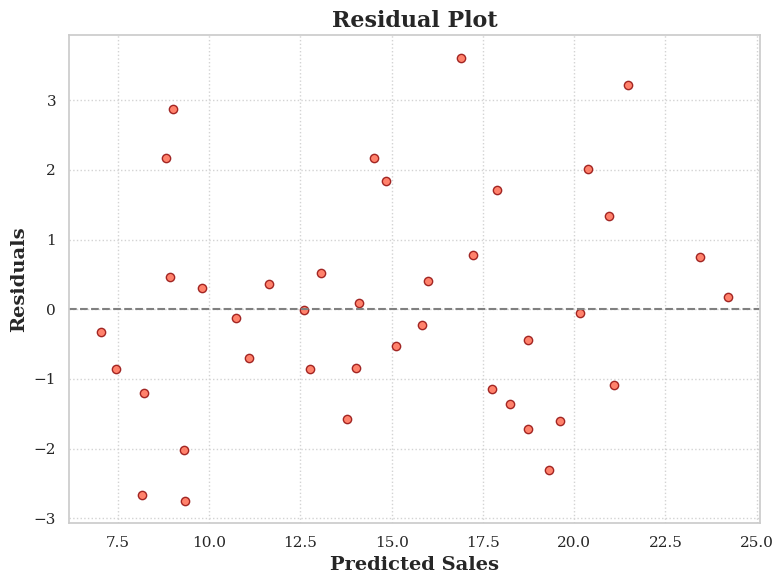

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='#FF6347', alpha=0.8, edgecolors='darkred')  # Tomato color for scatter points
plt.axhline(0, linestyle='--', color='gray', linewidth=1.5)  # Gray horizontal line at zero

plt.xlabel('Predicted Sales', fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
plt.title('Residual Plot', fontsize=16, fontweight='bold')
plt.grid(True, linestyle=':', color='lightgray')  # Light dotted grid for a softer appearance
plt.tight_layout()
plt.show()


### Insights:

**Residual Analysis**:  
The residuals are evenly distributed around the zero line, suggesting that the model provides a reasonable fit to the data with no significant bias. However, a few outlier points are present with larger residuals, which could indicate that the model doesn't fully capture some of the more extreme variations in the data.

**Model Assumptions**:  
The lack of a clear pattern in the residuals supports the assumption of homoscedasticity, meaning the variance of errors is constant. If a systematic pattern had emerged in the residuals, it would signal the need for potential improvements to the model, such as feature transformation or adjustments to the model's complexity.

In [ ]:
# Model Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {round(mse,2)}")
print(f"R-squared (R2): {round(r2,2)}")
print(f"Accuracy: {model.score(X_test, y_test) * 100:.2f}%")

Mean Squared Error (MSE): 2.42
R-squared (R2): 0.91
Accuracy: 91.30%


### Final Recommendations:

1. **Prioritize Investment in TV Advertising**  
Given the strong positive correlation between TV advertising and sales (~0.9), reallocating funds towards TV advertising is likely to yield significant returns. Focus on maintaining or increasing investment within the mid-range (150−250), where sales growth has been most consistent.

2. **Enhance Radio Advertising Strategically**  
While the correlation between Radio and sales is weaker than TV, it still shows a moderate positive impact (~0.35). Consider testing incremental increases in Radio spending to explore additional sales potential. Pairing Radio with TV campaigns could enhance overall effectiveness.

3. **Reevaluate or Reduce Newspaper Advertising**  
With a minimal correlation to sales (~0.05), Newspaper advertising has limited impact on revenue generation. It is advisable to significantly reduce or reallocate the budget for Newspaper advertising toward more impactful channels like TV and Radio.

4. **Run Pilot Campaigns for Budget Optimization**  
Implement pilot campaigns to test the effects of reallocating funds from Newspaper to TV and Radio. These pilots will help validate the potential for improved ROI while minimizing the risks associated with large-scale budget shifts.

5. **Adopt Integrated Campaign Strategies**  
Maximize the impact of advertising by integrating TV and Radio campaigns. Using Radio to complement TV ads can reinforce key messages and extend reach, ultimately improving overall campaign effectiveness.

6. **Leverage Data-Driven Insights for Optimization**  
Utilize predictive modeling to simulate the effects of different budget allocations and fine-tune advertising spend across channels. This will ensure the optimal use of resources and maximize campaign effectiveness.

7. **Consider External Influences**  
Factor in market trends, customer preferences, and regional variations to refine your advertising strategy. These insights will reveal new opportunities and ensure strategies remain aligned with changing market conditions.

### Conclusion:  
The analysis indicates that TV advertising is the most impactful channel, with a strong positive correlation to sales (0.9) , making it the priority for investment. Radio also shows moderate potential (0.35) and should be strategically enhanced. On the other hand, Newspaper advertising has minimal impact (0.05 correlation) and should be significantly reduced or shifted to more effective channels.

Reallocating budgets from Newspaper to TV and Radio, running pilot campaigns, and adopting an integrated approach will help maximize sales and ROI. Leveraging predictive models and market insights will further optimize strategies, ensuring ongoing success and growth in advertising efforts.